### Inizializzazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parametri importanti

M = 100                     # numero di zombi (iniziali)
N = 2*M**2                  # numero di combattenti vivi (iniziali)      # 2*M**2
perc_desiderata = 0.8       # Probabilità di vittoria desiderata

soglia = 10*M**2 + 1        # soglia massima di interazioni in una simulazione. Aumentata di 1 per evitare cutoff nel grafo # 10*M**2
k = 1000                    # numero di volte con cui simulare la funzione T

### Definizione di funzioni

In [3]:
# Generatore di una variabile X_i, variaible con distribuzione geometrica a supporto zero ( Geo_0(1/2) )
# Rappresenta il numero di zombi uccisi dal combattente i-esimo prima di essere ucciso
def X():
    # i=0                     # inizializziamo il contatore
    # # finché il numero casuale è minore di p (successo)
    # while np.random.uniform(0, 1) < 0.5:
    #     i=i+1               # aumentiamo il contatore
    # return i                # restituiamo il valore finale del contatore
    return np.random.geometric(0.5) - 1    # implementazione alternativa con numpy

# Simulazione passeggiata zombi
# Genera la lista Š, che è sempre pari a S_i ma diventa M quando i >= T_{M-1}
# S_i rappresenta il numero di zombi uccisi meno il numero di vivi morti in combattimento, fino al combattente i-esimo
def PasseggiataZombi(N, M):
    S = [0]
    for i in range(N):      # Ogni combattente i-esimo attacca indipendentemente; a fine ciclo se S[i] < M-1, i viventi sono stati sconfitti
        if S[i] < M - 1:    # Affinchè siamo prima dell'istante T_{M-1}, estendiamo la lista Š
            S.append(min(S[i] + X()-1, M))      # X()-1 è la variabile Y_i, che rappresenta il 'guadagno' in zombi uccisi del combattente i-esimo
        else:
            S.append(M)                         # Raggiunto T_{M-1}, continua ad aggiungere M. Gli zombi sono stati sconfitti!
    return S

# Simulazione della variabile aleatoria T_{M-1}
# Rappresenta il numero di passi necessari per sconfiggere gli zombi (S_i raggiunge M-1)
def T(M, soglia):
    i, S = 0, 0
    while S < M - 1 and i < soglia:
        S += X() - 1    # X()-1 è la variabile Y_i, che rappresenta il 'guadagno' in zombi uccisi del combattente i-esimo
        i += 1          
    return i            # Ritorniamo il numero dei cicli effettuati per raggiungere la soglia M-1 (o la soglia 'hard' in casi pessimi)

In [49]:
# Test delle funzioni
print("Test delle funzioni X(), PasseggiataZombi() e T()")
print("X(): " + str(X()))
print("PasseggiataZombi(10, 5): " + str(PasseggiataZombi(10, 5)))
print("T(100, 10000): " + str(T(100, 10000)))

Test delle funzioni X(), PasseggiataZombi() e T()
X(): 2
PasseggiataZombi(10, 5): [0, 3, 2, 1, 0, -1, 4, 5, 5, 5, 5]
T(100, 10000): 4641


### Grafici

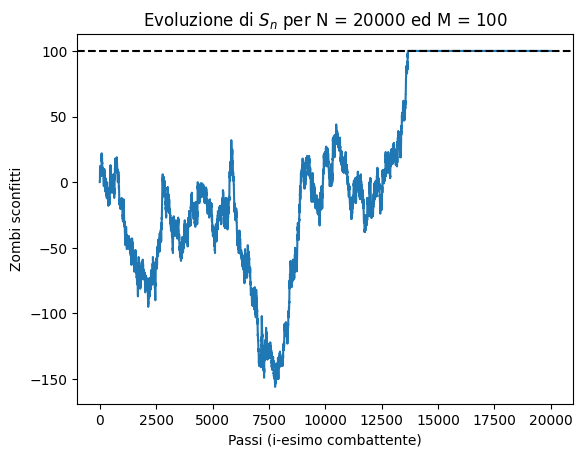

In [138]:
# Funzione di plotting della passeggiata zombi
def plot_walk(S, M):
    plt.plot(S)
    plt.title("Evoluzione di $S_n$ per N = {} ed M = {}".format(N,M))
    plt.xlabel("Passi (i-esimo combattente)")
    plt.ylabel("Zombi sconfitti")
    plt.axhline(y=M, color='black', linestyle='--')
    plt.show()

# Esempio
S = PasseggiataZombi(N, M)    # Numero di passi e soglia
plot_walk(S, M)

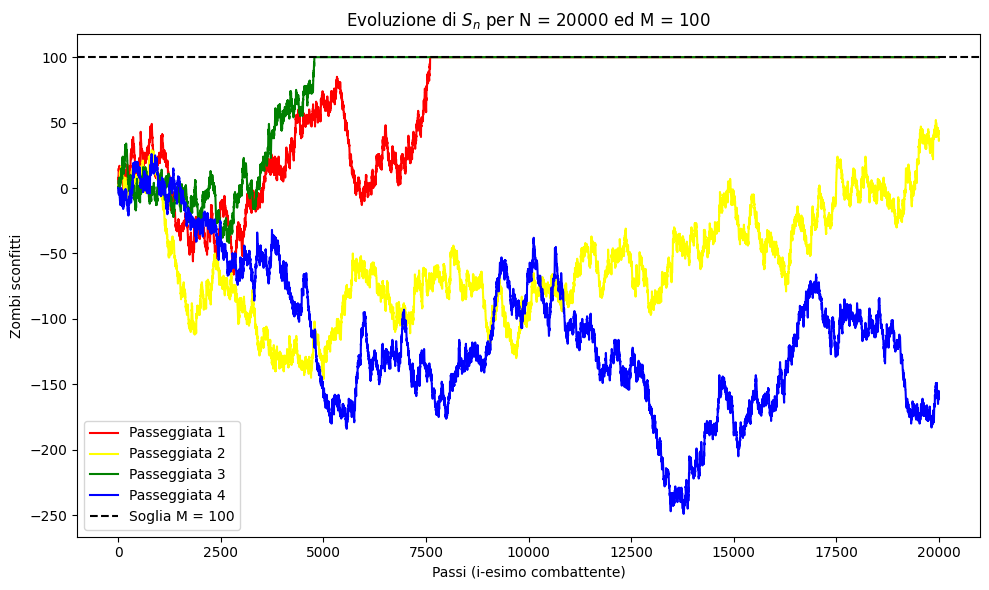

In [147]:
# Funzione per plottare molteplici passeggiate zombi
def plot_multiple_walks(N, M, num_walks=4):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'yellow', 'green', 'blue']
    
    # Simula e plottare num_walks passeggiate zombi
    for i in range(num_walks):
        S = PasseggiataZombi(N, M)
        plt.plot(S, label=f"Passeggiata {i+1}", color=colors[i % len(colors)])
    
    plt.title("Evoluzione di $S_n$ per N = {} ed M = {}".format(N,M))
    plt.xlabel("Passi (i-esimo combattente)")
    plt.ylabel("Zombi sconfitti")
    plt.axhline(M, color='black', linestyle='--', label='Soglia M = {}'.format(M))
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ricreazione dell'esempio nella documentazione
N_example = 20000
M_example = 100
plot_multiple_walks(N_example, M_example)

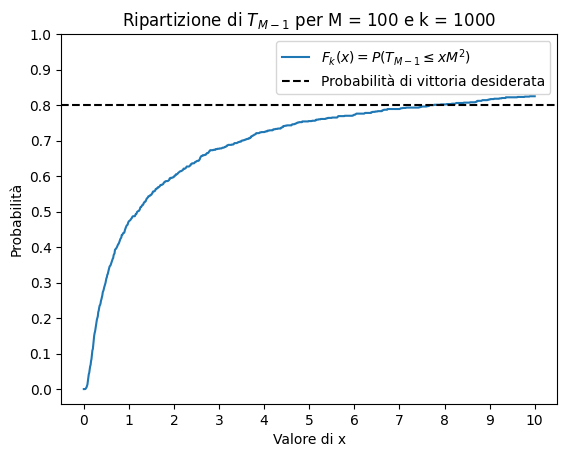

In [ ]:
# Funzione per plottare Fk, la funzione di ripartizione approssimata della variabile T_{M-1}
# Rappresenta la probabilità P(T_{M-1} <= x*M^2) in funzione di x, per x tra [0, 10]
def plot_T_distribution(M, k, soglia):
    x_values = np.linspace(0, 10, 1000) # Punti/valori di x tra 0 e 10
    T_array_scaled = np.array([T(M, soglia) for _ in range(k)]) / M**2  # Normalizzazione per M^2, quindi dopo si fa il confronto con x senza '*M^2'
    Fk_values = [np.mean(T_array_scaled <= x) for x in x_values]   # Calcolo della ripartizione

    plt.plot(x_values, Fk_values, label=r"$F_k(x) = P(T_{M-1} \leq x M^2)$")
    plt.title(f"Ripartizione di $T_{{M-1}}$ per M = {M} e k = {k}")
    plt.xlabel("Valore di x")
    plt.ylabel("Probabilità")
    plt.axhline(perc_desiderata, color='black', linestyle='--', label='Probabilità di vittoria desiderata')
    plt.legend()
    plt.xticks(np.linspace(0, 10, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.show()

# Esempio di plot della distribuzione di T_{M-1}
plot_T_distribution(M, k, soglia)

### Approfondimento

In [ ]:
def stima_accurata_x(M, k, soglia, perc_desiderata):
    if soglia is None:
        soglia = 10 * M**2  # Cutoff massimo per la funzione T

    T_array = np.array([T(M, soglia) for _ in range(k)]) / M**2  # Simulazioni

    x_values = np.linspace(0, 10, 100000)  # Maggiore risoluzione anche nel numero di punti 'x'
    for x in x_values:
        prob = np.mean(T_array <= x)
        if prob >= perc_desiderata:
            print(f"Il valore di x per cui viene raggiunta la probabilità desiderata ({perc_desiderata}) è: {x}")
            break   #return x

stima_accurata_x(M, k*100, soglia, perc_desiderata)  # k aumentato per una stima più accurata

Il valore di x per cui viene raggiunta la probabilità desiderata (0.8) è: 7.915479154791548


In [7]:
from scipy.stats import norm
from scipy.optimize import root_scalar

def funzione_limite(x):
    return 2 * (1 - norm.cdf(1 / np.sqrt(2 * x)))

def trova_x_teorico(perc_desiderata=perc_desiderata):
    def f(x):
        return funzione_limite(x) - perc_desiderata
    sol = root_scalar(f, bracket=[1e-3, 20], method='brentq')   # Ricerca della radice della funzione f col metodo di Brent
    return sol.root

x_teorico = trova_x_teorico()
print(f"Valore teorico di x per cui P ≈ {perc_desiderata}: x ≈ {x_teorico}\n")

# Calcolo della probabilità per il valore di x trovato
print("1 / np.sqrt(2 * x_teorico): ", 1 / np.sqrt(2 * x_teorico))         # ≈ 0.2533
print("2 * (1 - norm.cdf(1 / np.sqrt(2 * x_teorico))): ", 2 * (1 - norm.cdf(1 / np.sqrt(2 * x_teorico))))  # ≈ 0.8000

Valore teorico di x per cui P ≈ 0.8: x ≈ 7.790011858606083

1 / np.sqrt(2 * x_teorico):  0.25334710313579945
2 * (1 - norm.cdf(1 / np.sqrt(2 * x_teorico))):  0.8000000000000003


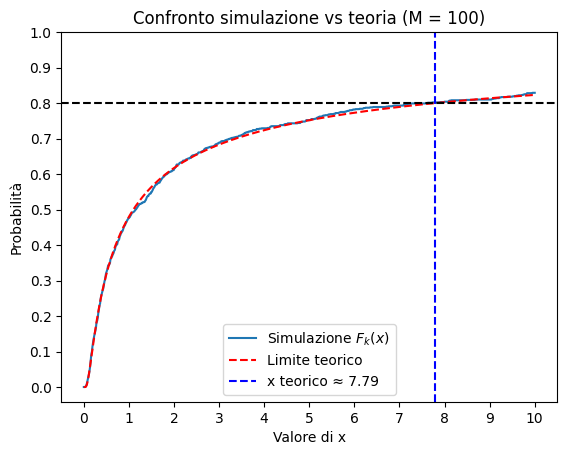

In [ ]:
# Comportamento asintotico della funzione di ripartizione

from scipy.stats import norm

def distribuzione_teorica(x_values):
    return [2 * (1 - norm.cdf(1 / np.sqrt(2 * x))) for x in x_values]   # cdf: 'cumulative distribution function', funzione di ripartizione

# Aggiunta al plot esistente
def plot_T_vs_teoria(M, k, soglia):
    x_values = np.linspace(0.001, 10, 1000)  # Evitiamo x = 0 per divisione
    T_array = np.array([T(M, soglia) for _ in range(k)]) / M**2  # Simulazioni normalizzate per M^2
    Fk_values = [np.mean(T_array <= x) for x in x_values]
    F_theoretical = distribuzione_teorica(x_values)

    plt.plot(x_values, Fk_values, label="Simulazione $F_k(x)$")
    plt.plot(x_values, F_theoretical, '--', color='red', label="Limite teorico")
    plt.axhline(perc_desiderata, color='black', linestyle='--')
    plt.axvline(x_teorico, color='blue', linestyle='--', label=f"x teorico ≈ {x_teorico:.2f}")
    plt.xlabel("Valore di x")
    plt.ylabel("Probabilità")
    plt.title(f"Confronto simulazione vs teoria (M = {M})")
    plt.legend()
    plt.xticks(np.linspace(0, 10, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.show()

plot_T_vs_teoria(M, k, soglia)